<a href="https://colab.research.google.com/github/we-insub/SelfStudy_Numpy_OpenCV_Deep/blob/main/015_Morphological_Operators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Morphological Operators

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
def load_img():
    blank_img =np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300), fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

In [35]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [36]:
img = load_img()

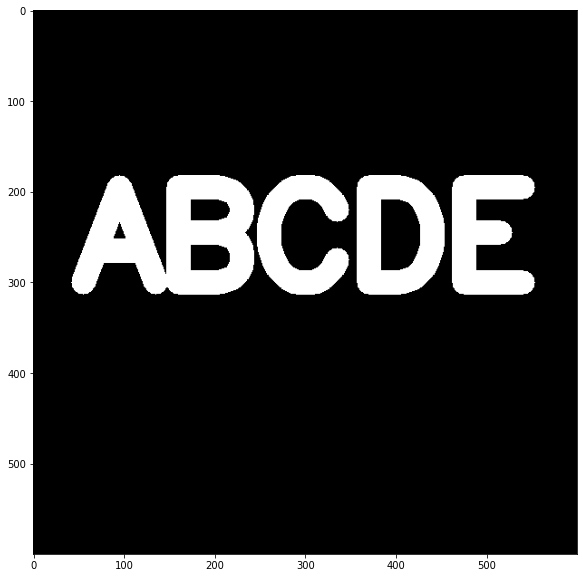

In [37]:
display_img(img)

## Erosion

Erodes away boundaries of foreground objects. Works best when foreground is light color (preferrably white) and background is dark.

In [38]:
kernel = np.ones((5,5),np.uint8)

In [39]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [40]:
result = cv2.erode(img,kernel,iterations=5) #iterations 값을 높일수록 사진의 이미지가 줄어들고 날카로워짐

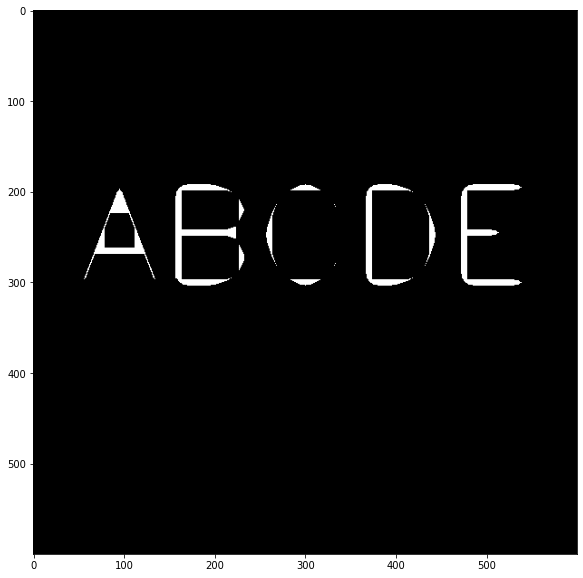

In [41]:
display_img(result)

## Opening
Opening is erosion followed by dilation. Useful in removing background noise!

In [42]:
img = load_img()


In [43]:
white_noise = np.random.randint(low=0,high=2,size=(600,600))

In [44]:
white_noise

array([[1, 1, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 1, 1],
       [1, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 1, 0],
       [1, 1, 0, ..., 1, 1, 1]])

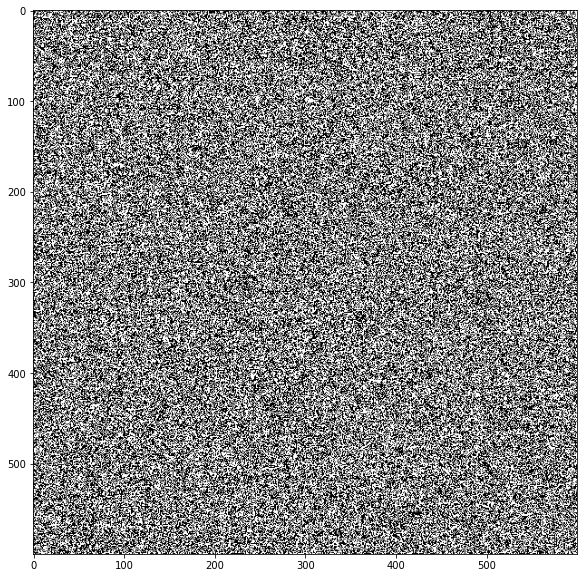

In [46]:
#display_img(white_noise)

In [47]:
img.max() # 1,0 배열을 맥스값으로 변경해야한다. 

255.0

In [48]:
 white_noise = white_noise * 255

In [49]:
white_noise

array([[255, 255, 255, ...,   0, 255,   0],
       [  0,   0,   0, ..., 255, 255, 255],
       [255,   0,   0, ...,   0, 255, 255],
       ...,
       [  0,   0, 255, ...,   0,   0, 255],
       [255,   0,   0, ..., 255, 255,   0],
       [255, 255,   0, ..., 255, 255, 255]])

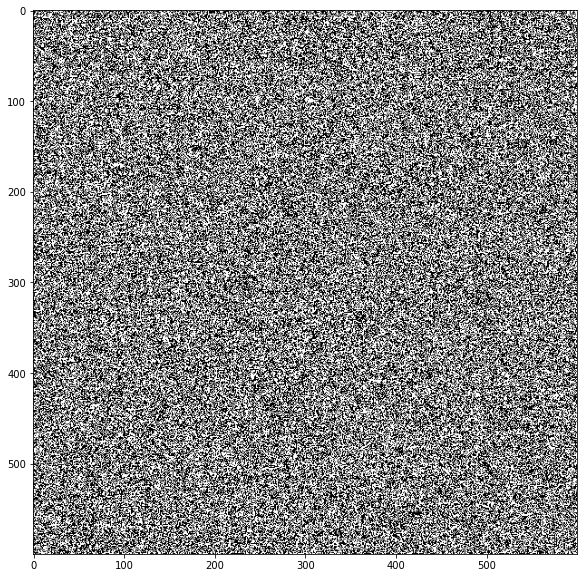

In [50]:
display_img(white_noise)

In [51]:
noise_img = white_noise + img

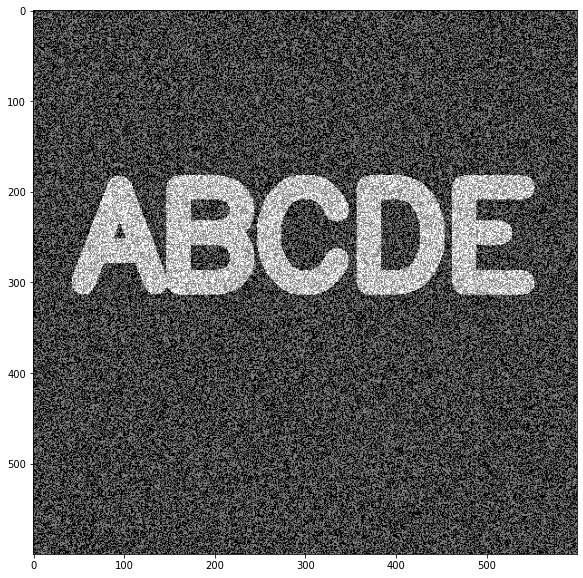

In [52]:
display_img(noise_img) # 노이즈를 255 로변경한 이유는 원래 abcde와 섞을때 자연스러워지게 하기위함

In [54]:
opening = cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel)

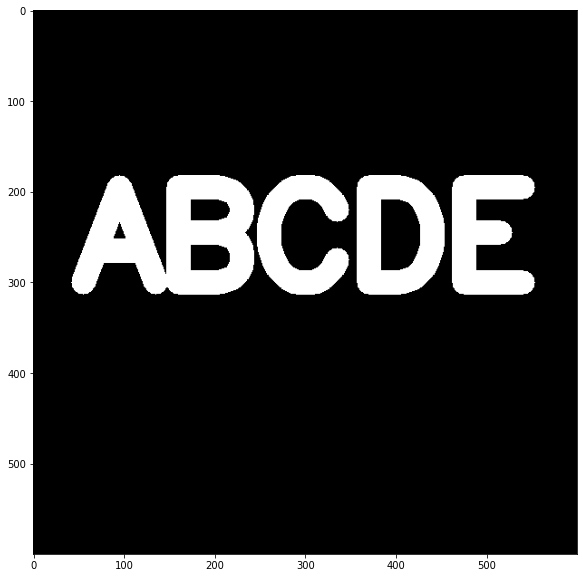

In [55]:
display_img(img)

### Closing
 Useful in removing noise from foreground objects, such as black dots on top of the white text.

Morphological Gradient
Difference between dilation and erosion of an image.

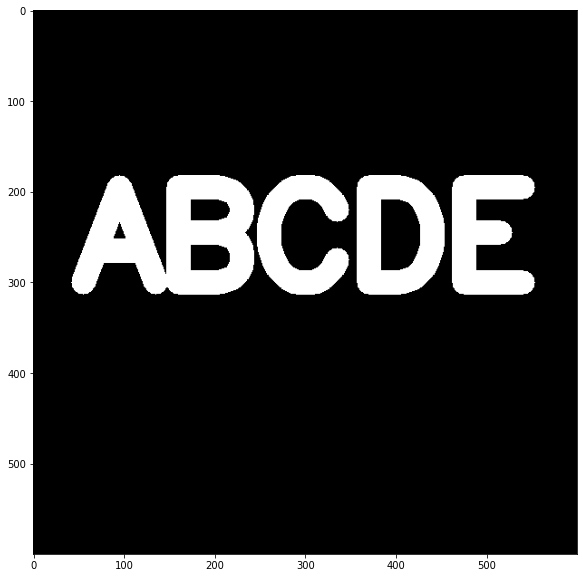

In [56]:
display_img(img)

In [57]:
# 이미지 재로드
img = load_img()

In [58]:
black_noise = np.random.randint(low=0,high=2,size=(600,600))

In [59]:
black_noise

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 1, 1],
       [0, 1, 0, ..., 1, 1, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 1]])

In [60]:
black_noise = black_noise * - 225

In [61]:
black_noise

array([[-225, -225, -225, ...,    0,    0,    0],
       [   0, -225, -225, ..., -225, -225, -225],
       [   0, -225,    0, ..., -225, -225,    0],
       ...,
       [-225, -225, -225, ...,    0,    0,    0],
       [   0, -225,    0, ...,    0,    0,    0],
       [-225,    0,    0, ..., -225,    0, -225]])

In [62]:
black_noise_img = img + black_noise

In [63]:
black_noise_img

array([[-225., -225., -225., ...,    0.,    0.,    0.],
       [   0., -225., -225., ..., -225., -225., -225.],
       [   0., -225.,    0., ..., -225., -225.,    0.],
       ...,
       [-225., -225., -225., ...,    0.,    0.,    0.],
       [   0., -225.,    0., ...,    0.,    0.,    0.],
       [-225.,    0.,    0., ..., -225.,    0., -225.]])

In [65]:
black_noise_img[black_noise_img == -255] = 0 

In [66]:
black_noise_img.min() # -255 인값을 제거해야한다.

-225.0

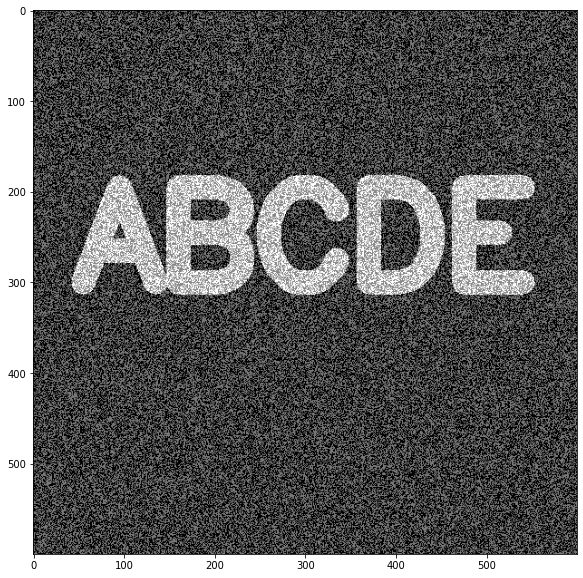

In [68]:
display_img(black_noise_img)

In [69]:
closing = cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernel)

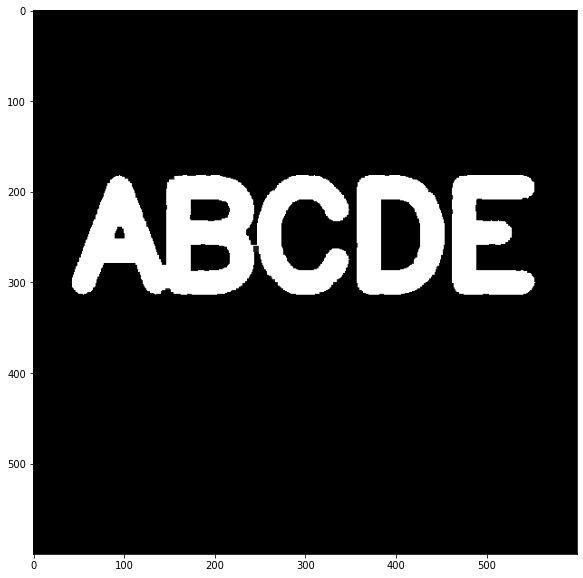

In [70]:
display_img(closing)

In [71]:
img = load_img()

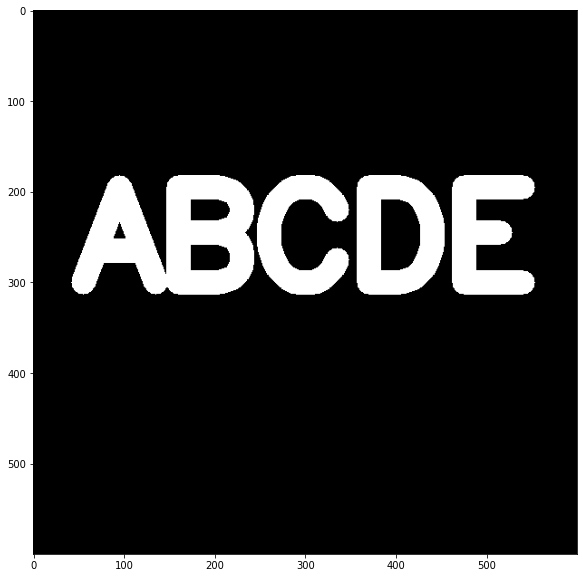

In [72]:
display_img(img)

In [73]:
gradinet = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

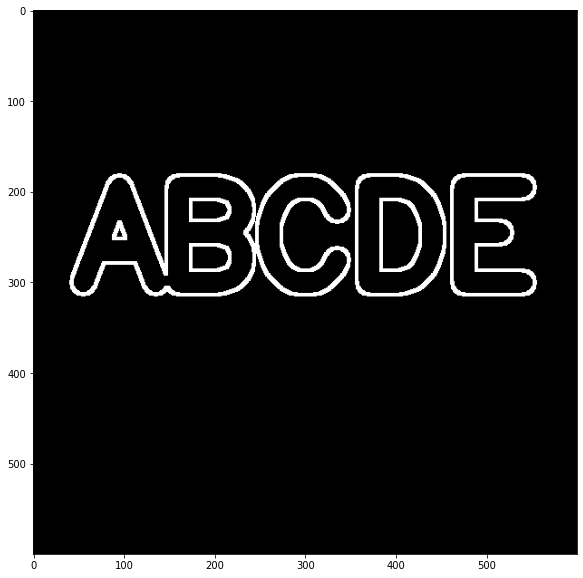

In [75]:
display_img(gradinet)